In [5]:
library(readr)
stats <- read_csv("stats.csv")
summary(stats)


Rows: 1406 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): last_name, first_name
dbl (29): player_id, year, player_age, ab, pa, hit, single, double, triple, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


 last_name, first_name   player_id           year        player_age   
 Length:1406           Min.   :116338   Min.   :2015   Min.   :20.00  
 Class :character      1st Qu.:514917   1st Qu.:2017   1st Qu.:26.00  
 Mode  :character      Median :592206   Median :2019   Median :28.00  
                       Mean   :566834   Mean   :2019   Mean   :28.33  
                       3rd Qu.:641820   3rd Qu.:2022   3rd Qu.:31.00  
                       Max.   :808982   Max.   :2024   Max.   :41.00  
       ab              pa             hit            single     
 Min.   :132.0   Min.   :152.0   Min.   : 24.0   Min.   : 12.0  
 1st Qu.:457.0   1st Qu.:511.0   1st Qu.:107.2   1st Qu.: 60.0  
 Median :514.0   Median :576.5   Median :135.0   Median : 83.0  
 Mean   :462.5   Mean   :518.7   Mean   :123.6   Mean   : 77.8  
 3rd Qu.:569.0   3rd Qu.:640.0   3rd Qu.:156.0   3rd Qu.:100.0  
 Max.   :681.0   Max.   :753.0   Max.   :217.0   Max.   :170.0  
     double          triple          home_run   

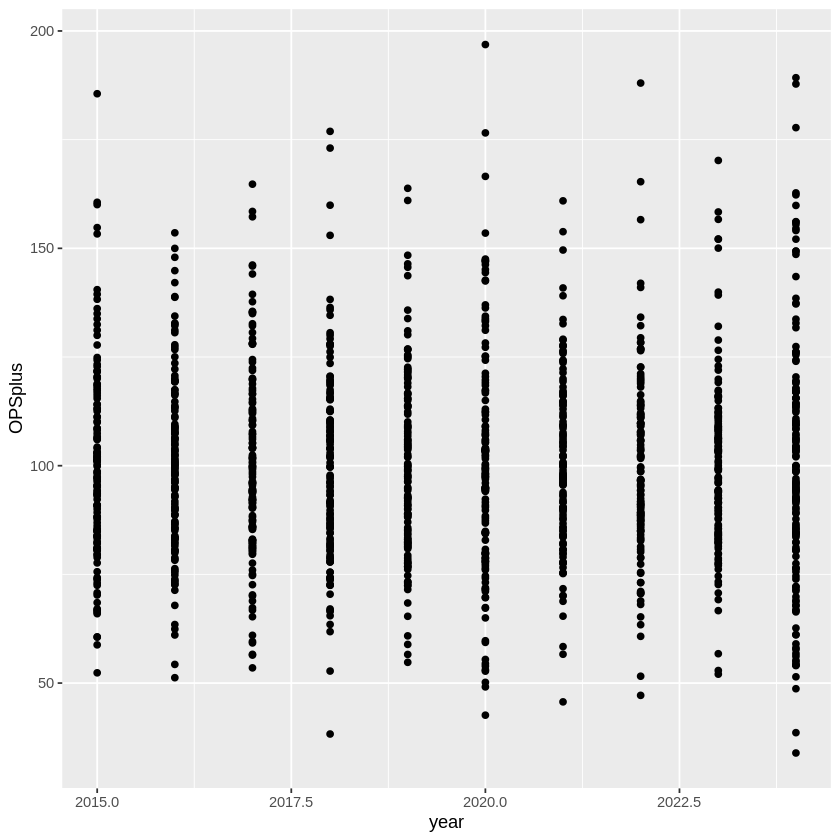

In [11]:
# prompt: group league averages of on_base_percent and slg_percent by year and add a new column to calculate ops+ for each player. The formula for is OPS+ = 100×((OBP÷lgOBP)+(SLG÷lgSLG)-1), with lgOBP and lgSLG representing the league average for that statistic in that year. Plot OPSplus with a scatterplot by year withh each player plotted

library(dplyr)
library(ggplot2)

# Calculate league averages for on-base percentage and slugging percentage by year
league_stats <- stats %>%
  group_by(year) %>%
  summarise(lgOBP = mean(on_base_percent),
            lgSLG = mean(slg_percent))

# Join league averages back to player data
stats <- stats %>%
  left_join(league_stats, by = "Year") %>%
  mutate(OPSplus = 100*((on_base_percent/lgOBP)+(slg_percent/lgSLG)-1))

# Create scatterplot of OPSplus by year with each player plotted
ggplot(stats, aes(x = year, y = OPSplus)) +
  geom_point()


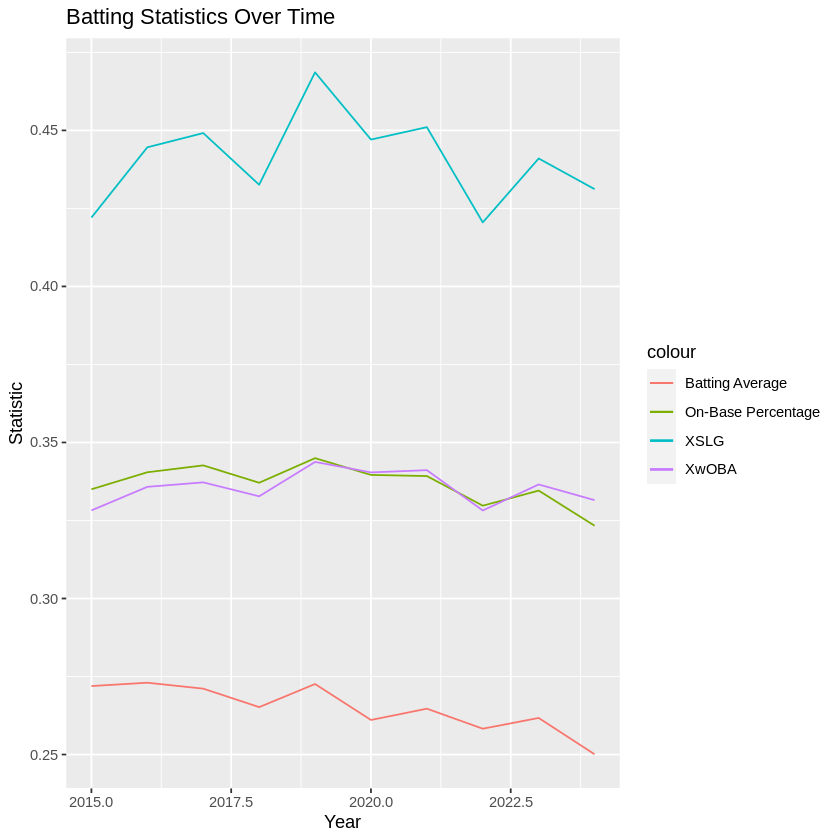

In [49]:
library(dplyr)
library(ggplot2)

stats_by_year <- stats %>%
  filter(year >= 2000) %>%
  group_by(year) %>%
  summarise(
    batting_avg = mean(batting_avg, na.rm = TRUE),
    on_base_percent = mean(on_base_percent, na.rm = TRUE),
    xslg = mean(xslg, na.rm = TRUE),
    xwoba = mean(xwoba, na.rm = TRUE)
  )

ggplot(stats_by_year, aes(x = year)) +
  geom_line(aes(y = batting_avg, color = "Batting Average")) +
  geom_line(aes(y = on_base_percent, color = "On-Base Percentage")) +
  geom_line(aes(y = xslg, color = "XSLG")) +
  geom_line(aes(y = xwoba, color = "XwOBA")) +
  labs(title = "Batting Statistics Over Time",
       x = "Year",
       y = "Statistic")


`geom_smooth()` using formula = 'y ~ x'


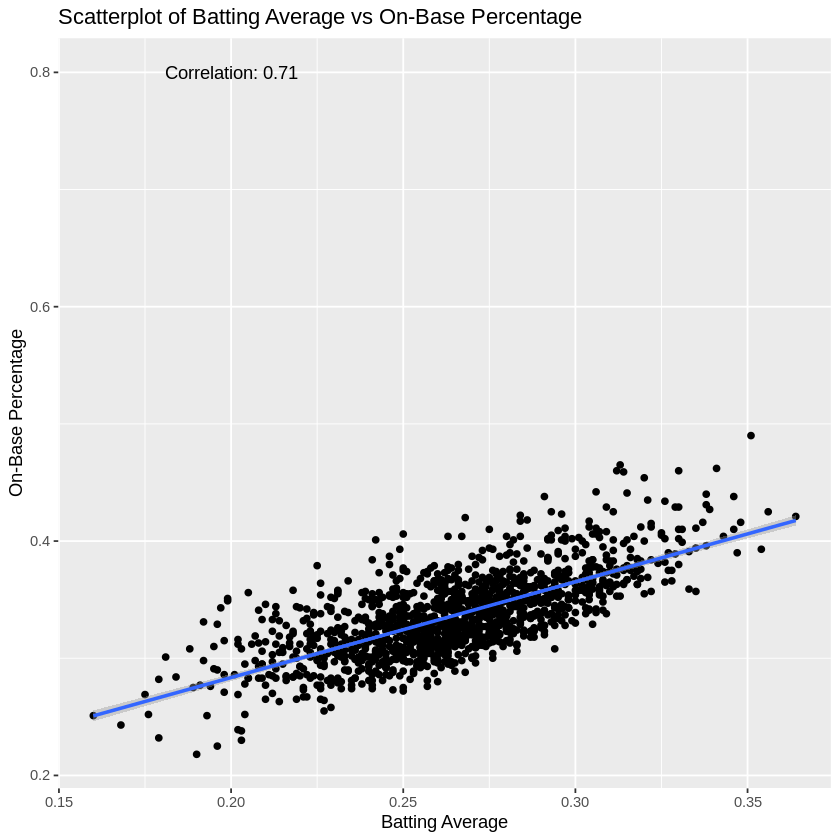

In [21]:
# prompt: perform a meaninful analysis on some of the data and create a relevant chart using ggplot

# Calculate the correlation between batting average and on-base percentage
correlation <- cor(stats$batting_avg, stats$on_base_percent)

# Create a scatterplot of batting average vs. on-base percentage
ggplot(stats, aes(x = batting_avg, y = on_base_percent)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Batting Average vs. On-Base Percentage",
       x = "Batting Average",
       y = "On-Base Percentage") +
  annotate("text", x = 0.25, y = 0.8, label = paste("Correlation:", round(correlation, 2)))


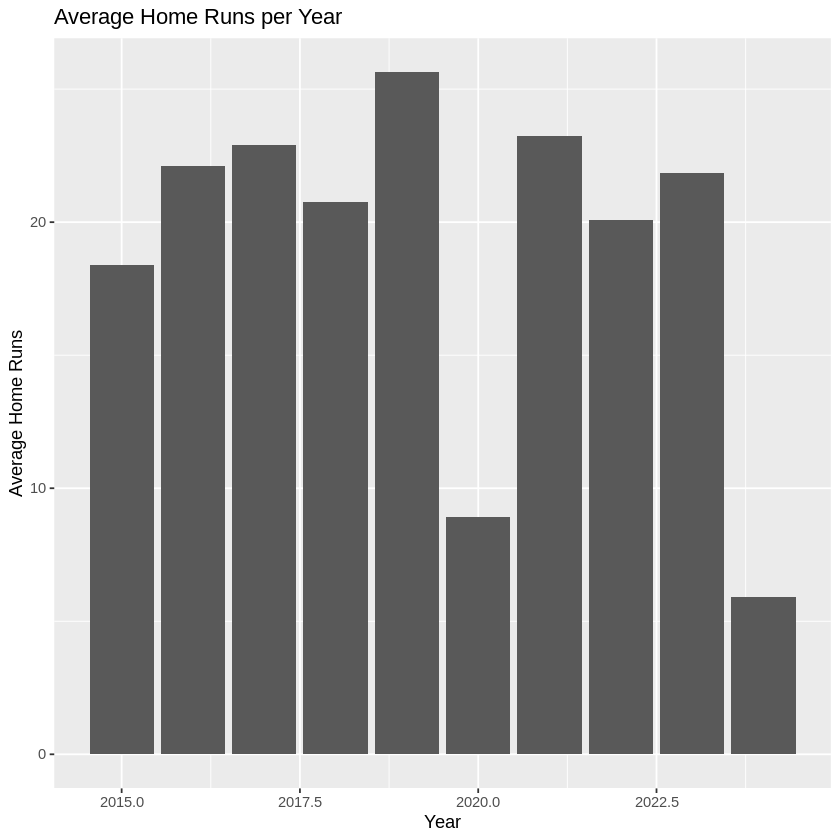

In [ ]:
# prompt: perform a meaninful analysis on some of the data and create a relevant chart using ggplot

# Calculate the average home runs per year
hr_by_year <- stats %>%
  filter(year >= 2000) %>%
  group_by(year) %>%
  summarise(
    avg_hr = mean(home_run, na.rm = TRUE)
  )

# Create a bar chart of average home runs per year
ggplot(hr_by_year, aes(x = year, y = avg_hr)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Home Runs per Year",
       x = "Year",
       y = "Average Home Runs")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



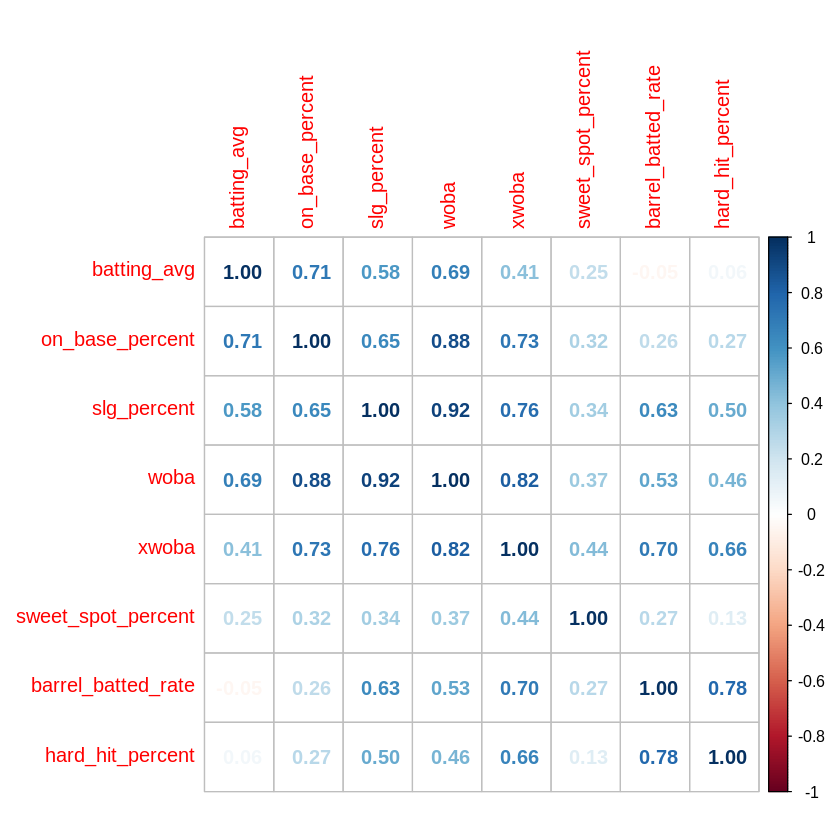

In [18]:
# prompt: create a correlation matrix for all relevant variables and note the correlation coeffeciant into all boxes
install.packages("corrplot")
library(corrplot)

# Create a correlation matrix
correlation_matrix <- cor(stats[, c("batting_avg", "on_base_percent", "slg_percent", "woba", "xwoba", "sweet_spot_percent", "barrel_batted_rate", "hard_hit_percent")])

# Add correlation coefficients to the boxes
corrplot(correlation_matrix, method = "number")


`geom_smooth()` using formula = 'y ~ x'


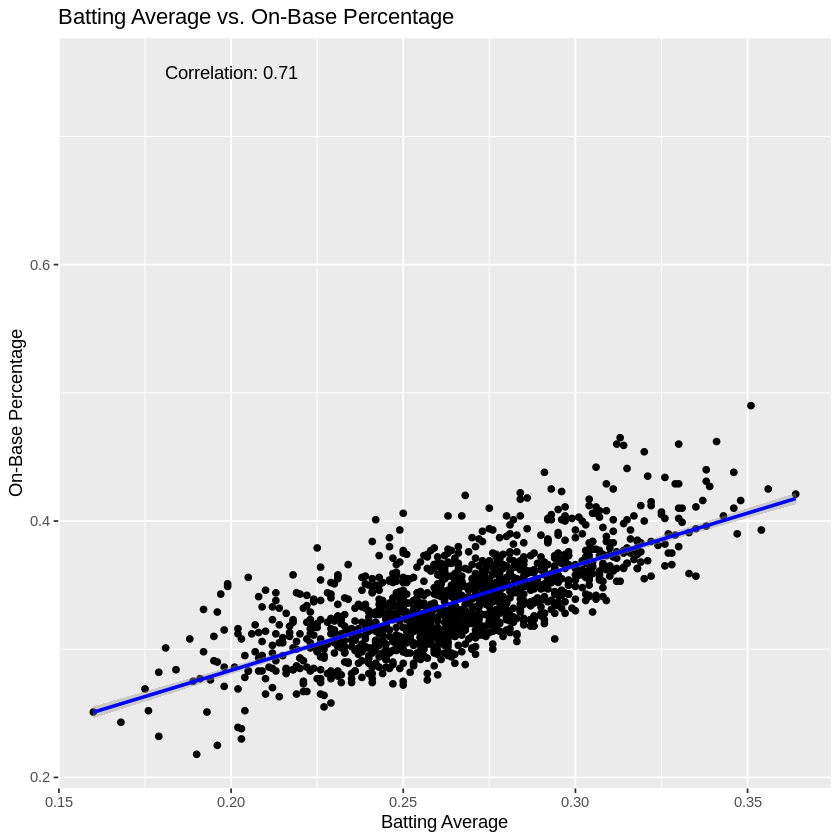

In [22]:
# prompt: perform a meaninful analysis on some of the data and create a relevant chart using ggplot

# Calculate the correlation between batting average and on-base percentage
correlation <- cor(stats$batting_avg, stats$on_base_percent)

# Create a scatterplot with a regression line
ggplot(stats, aes(x = batting_avg, y = on_base_percent)) +
  geom_point() +
  geom_smooth(method = "lm", color = "blue") +
  labs(title = "Batting Average vs. On-Base Percentage",
       x = "Batting Average",
       y = "On-Base Percentage") +
  annotate("text", x = 0.2, y = 0.75, label = paste("Correlation:", round(correlation, 2)))


In [31]:
# prompt: print a table of sum of 'walk' by year

stats %>%
  group_by(year) %>%
  summarise(sum_walk = sum(walk))


year,sum_walk
<dbl>,<dbl>
2015,6997
2016,7831
2017,7953
2018,7750
2019,7475
2020,3095
2021,7296
2022,6808
2023,7388


In [48]:
# prompt: whats the correlation between 'barrel_batted_rate' and 'home run' and fit a linear model to it

# Calculate the correlation between barrel_batted_rate and home_run
correlation <- cor(stats$barrel_batted_rate, stats$home_run)

# Fit a linear model to the data
model <- lm(home_run ~ barrel_batted_rate, data = stats)

# Print the correlation and model summary
print(paste("Correlation:", round(correlation, 2)))
summary(model)


[1] "Correlation: 0.59"



Call:
lm(formula = home_run ~ barrel_batted_rate, data = stats)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.725  -5.260   0.820   6.053  27.357 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.27356    0.51579   12.16   <2e-16 ***
barrel_batted_rate  1.53524    0.05651   27.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.86 on 1404 degrees of freedom
Multiple R-squared:  0.3446,	Adjusted R-squared:  0.3441 
F-statistic: 738.2 on 1 and 1404 DF,  p-value: < 2.2e-16


In [38]:
# prompt: construct a 2 variable t test of strong relevance to the data that is a useful analysis

# H0: There is no significant difference in batting average between players who hit more than 10 home runs and those who hit less than 10 home runs.
# H1: There is a significant difference in batting average between players who hit more than 10 home runs and those who hit less than 10 home runs.

# Create two groups based on home run count
high_hr <- filter(stats, home_run > 10)
low_hr <- filter(stats, home_run <= 10)

# Perform a two-sample t-test
t.test(high_hr$batting_avg, low_hr$batting_avg, var.equal = TRUE)

# Interpret the results
if (t.test(high_hr$batting_avg, low_hr$batting_avg, var.equal = TRUE)$p.value < 0.05) {
  print("There is a statistically significant difference in batting average between players who hit more than 10 home runs and those who hit less than 10 home runs.")
} else {
  print("There is no statistically significant difference in batting average between players who hit more than 10 home runs and those who hit less than 10 home runs.")
}



	Two Sample t-test

data:  high_hr$batting_avg and low_hr$batting_avg
t = 4.6868, df = 1404, p-value = 3.044e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.004901804 0.011958689
sample estimates:
mean of x mean of y 
0.2671337 0.2587034 


[1] "There is a statistically significant difference in batting average between players who hit more than 10 home runs and those who hit less than 10 home runs."



Call:
lm(formula = batting_avg ~ on_base_percent, data = stats)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.074803 -0.013483  0.001692  0.015464  0.057486 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.056682   0.005524   10.26   <2e-16 ***
on_base_percent 0.618579   0.016328   37.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02124 on 1404 degrees of freedom
Multiple R-squared:  0.5055,	Adjusted R-squared:  0.5052 
F-statistic:  1435 on 1 and 1404 DF,  p-value: < 2.2e-16


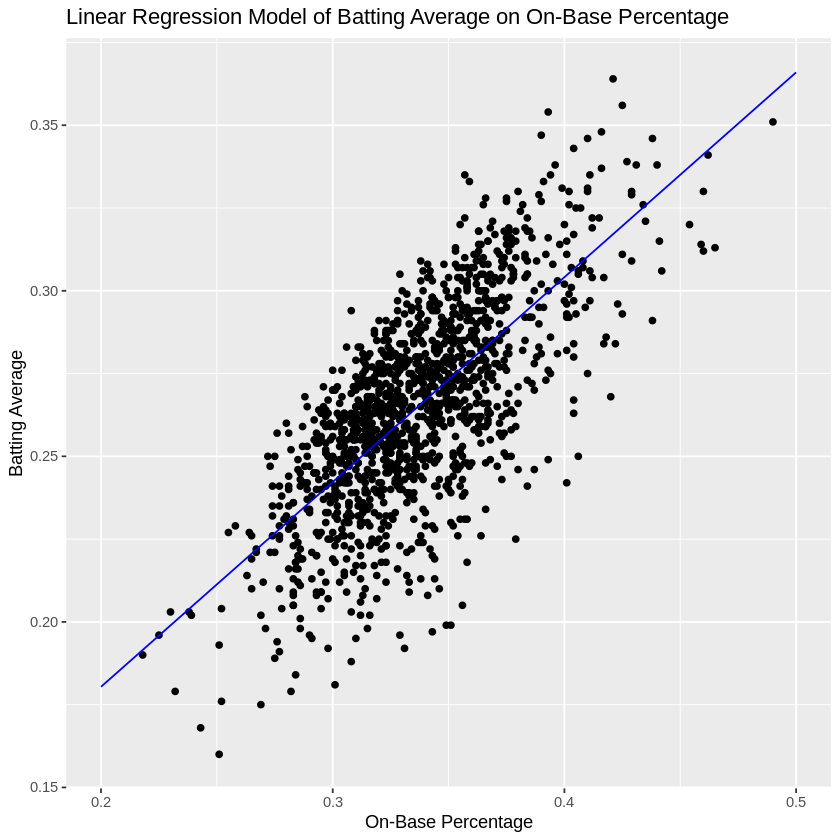

In [47]:
# prompt: make a relevant linear regression model on the data to analyze a part

# Create a linear regression model to predict batting average based on on-base percentage
model <- lm(batting_avg ~ on_base_percent, data = stats)

# Print the model summary
summary(model)

# Make predictions using the model
new_data <- data.frame(on_base_percent = seq(0.2, 0.5, 0.01))
predictions <- predict(model, newdata = new_data)

# Plot the data and the regression line
ggplot(stats, aes(x = on_base_percent, y = batting_avg)) +
  geom_point() +
  geom_line(data = new_data, aes(y = predictions), color = "blue") +
  labs(title = "Linear Regression Model of Batting Average on On-Base Percentage",
       x = "On-Base Percentage",
       y = "Batting Average")
